<a href="https://colab.research.google.com/github/kushdaga217/Stock-price-prediction/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from datetime import date
import copy

In [2]:
max_transaction = int(input())
total_money = int(input())

100
50000


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
data = pd.read_csv('gdrive/My Drive/MRF.BO.csv')
print(data.head())
print('Shape of data ', data.shape)

         Date    Open         High          Low        Close    Adj Close  \
0  2009-01-02  2010.0  2094.899902  2010.000000  2041.500000  1971.716309   
1  2009-01-05  2077.5  2077.500000  2035.099976  2059.000000  1988.618408   
2  2009-01-06  2082.0  2082.699951  2025.000000  2050.000000  1979.926392   
3  2009-01-07  2083.0  2083.000000  1882.000000  1900.000000  1835.053589   
4  2009-01-09  1822.0  1915.000000  1800.000000  1835.650024  1772.903076   

   Volume  
0  1016.0  
1   681.0  
2   661.0  
3  1099.0  
4  1006.0  
Shape of data  (2711, 7)


In [5]:
print(data.isnull().sum())

Date          0
Open         13
High         13
Low          13
Close        13
Adj Close    13
Volume       13
dtype: int64


In [6]:
data.dropna(inplace = True)

In [7]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000
mean,30919.592581,31282.721381,30546.136025,30880.024454,30682.824818,3590.595256
std,24203.916015,24424.684244,23945.706928,24160.101749,24106.391686,7092.260113
min,1503.000000,1549.949951,1501.000000,1533.250000,1490.835815,0.000000
25%,7778.224976,7914.250000,7692.575074,7760.624878,7606.206421,760.000000
50%,23374.024414,23681.924804,23180.000000,23380.000000,23162.207032,1738.500000
75%,53824.238282,54346.250000,53230.375976,53770.800781,53622.372071,3661.750000
max,81097.648438,81423.000000,79700.046875,80821.000000,80480.453125,129383.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2698 entries, 0 to 2710
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2698 non-null   object 
 1   Open       2698 non-null   float64
 2   High       2698 non-null   float64
 3   Low        2698 non-null   float64
 4   Close      2698 non-null   float64
 5   Adj Close  2698 non-null   float64
 6   Volume     2698 non-null   float64
dtypes: float64(6), object(1)
memory usage: 168.6+ KB


In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
print(data.head())

              Open         High          Low        Close    Adj Close  Volume
Date                                                                          
2009-01-02  2010.0  2094.899902  2010.000000  2041.500000  1971.716309  1016.0
2009-01-05  2077.5  2077.500000  2035.099976  2059.000000  1988.618408   681.0
2009-01-06  2082.0  2082.699951  2025.000000  2050.000000  1979.926392   661.0
2009-01-07  2083.0  2083.000000  1882.000000  1900.000000  1835.053589  1099.0
2009-01-09  1822.0  1915.000000  1800.000000  1835.650024  1772.903076  1006.0


In [11]:
data_split_value = '2017-12-31'
train = data[:data_split_value]
test = data[data_split_value:]
print(train.tail())

                    Open          High           Low         Close  \
Date                                                                 
2017-12-22  70988.453125  73072.601563  70988.453125  72709.203125   
2017-12-26  72602.796875  74499.000000  72222.000000  74017.351563   
2017-12-27  74100.000000  74305.953125  72503.351563  72958.703125   
2017-12-28  73136.898438  73799.953125  72590.046875  73512.648438   
2017-12-29  73579.500000  73846.953125  72200.000000  72348.148438   

               Adj Close  Volume  
Date                              
2017-12-22  72399.742188  1592.0  
2017-12-26  73702.343750  1222.0  
2017-12-27  72648.187500   749.0  
2017-12-28  73199.765625   675.0  
2017-12-29  72040.234375   687.0  


In [20]:
test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,72500.101563,73163.453125,71930.351563,72249.648438,71942.140625,592.0
2018-01-02,72687.453125,72687.453125,71125.046875,71222.453125,70919.328125,520.0
2018-01-03,71500.000000,71863.101563,71000.000000,71191.601563,70888.601563,667.0
2018-01-04,71654.296875,71654.296875,70938.953125,71200.101563,70897.062500,416.0
2018-01-05,71000.000000,72960.000000,71000.000000,72877.953125,72567.789063,649.0


In [12]:
class Environment:
    
    def __init__(self, data,max_transaction, total_money, history_t=90):
        self.data = data
        self.history_t = history_t
        self.max_transaction = max_transaction
        self.total_money = total_money
        self.share_purchase = []
        self.reset()
        
    def reset(self):
        self.t = 0
        self.done = False
        self.profits = 0
        self.current_stock_bought = 0
        self.current_transaction_count = 0
        self.position_value = 0
        self.history = [0 for _ in range(self.history_t)]
        
        return self.history
        
    def step(self,act):
        reward = 0
        x = self.total_money/(self.max_transaction - self.current_transaction_count)
        
        if act == 1 and self.current_transaction_count < self.max_transaction and self.total_money >= x:
            self.share_purchase.append(data.iloc[self.t,:]['Close'])
            self.total_money = self.total_money - x
            self.current_stock_bought += x/(self.data.iloc[self.t,:]['Close'])
            self.current_transaction_count += 1
            
        elif act == 2:
            if self.current_transaction_count == 0:
                reward -= self.data.iloc[self.t,:]['Close']*0.2
            
            profits = 0
            self.total_money += (self.data.iloc[self.t,:]['Close'])*self.current_stock_bought
            self.current_stock_bought = 0
            self.current_transaction_count = 0
            
            for p in self.share_purchase:
                profits += self.data.iloc[self.t,:]['Close'] - p
            reward += profits
            
            self.positions = []
            
        self.t += 1
        
        self.history.pop(0)
        if self.t < data.shape[0] - 1:
            self.history.append(self.data.iloc[self.t,:]['Close'] - self.data.iloc[(self.t - 1),:]['Close'])
        
        return self.history, reward,self.done 

In [13]:
class DeepQNetwork(nn.Module):
    def __init__(self, lr, input_dims, fc1_dims, fc2_dims, 
            n_actions):
        super(DeepQNetwork, self).__init__()
        self.input_dims = input_dims
        self.fc1_dims = fc1_dims
        self.fc2_dims = fc2_dims
        self.n_actions = n_actions
        self.fc1 = nn.Linear(self.input_dims, self.fc1_dims)
        self.fc2 = nn.Linear(self.fc1_dims, self.fc2_dims)
        self.fc3 = nn.Linear(self.fc2_dims, self.n_actions)

        self.optimizer = optim.Adam(self.parameters(), lr=lr)
        self.loss = nn.MSELoss()
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        actions = self.fc3(x)

        return actions

In [14]:
class Agent():
    def __init__(self, gamma, epsilon, lr, input_dims, batch_size, n_actions,
            max_mem_size=10000, eps_end=0.05, eps_dec=5e-4):
        self.input_dims = input_dims
        self.gamma = gamma
        self.epsilon = epsilon
        self.eps_min = eps_end
        self.eps_dec = eps_dec
        self.lr = lr
        self.action_space = [i for i in range(n_actions)]
        self.mem_size = max_mem_size
        self.batch_size = batch_size
        self.mem_cntr = 0
        self.iter_cntr = 0

        self.Q_eval = DeepQNetwork(lr, n_actions=n_actions, input_dims=self.input_dims,
                                    fc1_dims=256, fc2_dims=256)
        self.Q_next = DeepQNetwork(lr, n_actions=n_actions, input_dims=self.input_dims,
                                    fc1_dims=64, fc2_dims=64)

        self.state_memory = np.zeros((self.mem_size, self.input_dims), dtype=np.float32)
        self.new_state_memory = np.zeros((self.mem_size, self.input_dims), dtype=np.float32)
        self.action_memory = np.zeros(self.mem_size, dtype=np.int32)
        self.reward_memory = np.zeros(self.mem_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.mem_size, dtype=np.bool)

    def store_transition(self, state, action, reward, state_, terminal):
        index = self.mem_cntr % self.mem_size
        self.state_memory[index] = state
        self.new_state_memory[index] = state_
        self.reward_memory[index] = reward
        self.action_memory[index] = action
        self.terminal_memory[index] = terminal

        self.mem_cntr += 1

    def choose_action(self, observation):
        if np.random.random() > self.epsilon:
            state = T.tensor([observation],dtype=T.float32).to(self.Q_eval.device)
            actions = self.Q_eval.forward(state)
            action = T.argmax(actions).item()
        else:
            action = np.random.choice(self.action_space)

        return action

    def learn(self):
        if self.mem_cntr < self.batch_size:
            return

        self.Q_eval.optimizer.zero_grad()
        
        max_mem = min(self.mem_cntr, self.mem_size)

        batch = np.random.choice(max_mem, self.batch_size, replace=False)
        
        batch_index = np.arange(self.batch_size, dtype=np.int32)

        state_batch = T.tensor(self.state_memory[batch]).to(self.Q_eval.device)
        new_state_batch = T.tensor(self.new_state_memory[batch]).to(self.Q_eval.device)
        action_batch = self.action_memory[batch]
        reward_batch = T.tensor(self.reward_memory[batch]).to(self.Q_eval.device)
        terminal_batch = T.tensor(self.terminal_memory[batch]).to(self.Q_eval.device)

        q_eval = self.Q_eval.forward(state_batch)[batch_index, action_batch]
        q_next = self.Q_eval.forward(new_state_batch)
        q_next[terminal_batch] = 0.0

        q_target = reward_batch + self.gamma*T.max(q_next,dim=1)[0]

        loss = self.Q_eval.loss(q_target, q_eval).to(self.Q_eval.device)
        loss.backward()
        self.Q_eval.optimizer.step()

        self.iter_cntr += 1
        self.epsilon = self.epsilon - self.eps_dec if self.epsilon > self.eps_min else self.eps_min

In [15]:
env = Environment(data = train, max_transaction=max_transaction, total_money= total_money)

agent = Agent(gamma=0.99, epsilon=1.0, batch_size=64, n_actions=3, eps_end=0.01, input_dims= env.history_t, lr=0.001)
total_rewards, actions = [], []
n_epochs = 10
obs = []
for i in range(n_epochs):
    total_reward = 0
    j = 0
    done = False
    observation = env.reset()
    while not done and j < 50:
        j += 1
        action = agent.choose_action(observation)
        actions.append(action)
        observation_, reward, done = env.step(action)
        total_reward += reward
        agent.store_transition(observation, action, reward, observation_, done)
        agent.learn()
        observation = observation_
    total_rewards.append(total_reward)
    obs = copy.deepcopy(observation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [16]:
print(len(actions))
print(len(obs))
action_taken = actions[len(actions) - len(obs):]
print(len(action_taken))

500
90
90


In [17]:
profiatble_or_not = []
action_taken = actions[len(actions) - len(obs):]

for i in range(len(obs)):
  if (obs[i] > 0 and action_taken[i] != 2) or (obs[i] < 0 and action_taken[i] != 1) or (obs[i]==0):
    profiatble_or_not.append('Profitable')
    
  else:
    profiatble_or_not.append('Not Profitable')

ans = {
    'Actions':action_taken,
    'Reward':obs,
    'profitable':profiatble_or_not
}
ans = pd.DataFrame(ans)

In [18]:
ans

,Actions,Reward,profitable
0,2,0.000000,Profitable
1,0,0.000000,Profitable
2,2,0.000000,Profitable
3,1,0.000000,Profitable
4,1,0.000000,Profitable
...,...,...,...
85,1,18.400024,Profitable
86,0,49.400025,Profitable
87,0,14.849975,Profitable
88,0,17.750000,Profitable


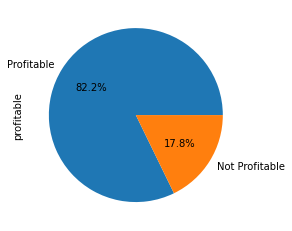

In [19]:
ans['profitable'].value_counts().plot.pie(autopct = '%1.1f%%')